<a href="https://colab.research.google.com/github/MarcosLaydner/ds_repo/blob/master/Lab_2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



In [9]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	alpha = 95

	samples = np.random.choice(sample, (n_iterations, sample_size))
	data_mean = np.mean(samples)
	iterations_means = np.sort(np.mean(samples, axis=1))

	upper = np.percentile(iterations_means, 100-((100-alpha)/2))
	lower = np.percentile(iterations_means, ((100-alpha)/2))
 
	return data_mean, lower, upper

boot = boostrap_mean(data, data.shape[0], 5)

(0, 100000)

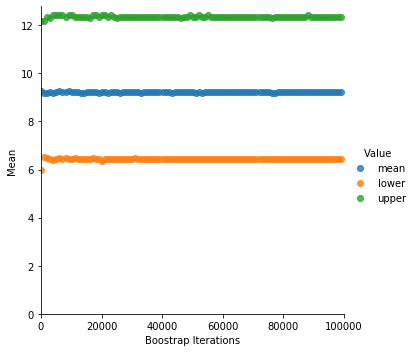

In [81]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

# sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):

	samples = np.random.choice(sample, (n_iterations, sample_size))
	data_mean = np.mean(samples)
	iterations_means = np.sort(np.mean(samples, axis=1))

	upper = np.percentile(iterations_means, 100-((100-ci)/2))
	lower = np.percentile(iterations_means, ((100-ci)/2))

	return data_mean, lower, upper

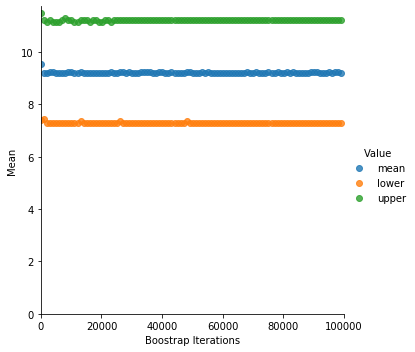

In [83]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
current_fleet = df.values.T[0]
new_fleet = df.values.T[1]
new_fleet = new_fleet[~np.isnan(new_fleet)]

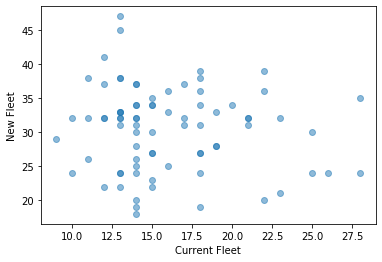

In [111]:
x = current_fleet
y = new_fleet

area = np.pi*3

# Plot
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Current Fleet')
plt.ylabel('New Fleet')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 3.,  2.,  4.,  1., 10.,  2.,  7.,  1.,  8., 12.,  5.,  8.,  3.,
         8.,  2.,  1.,  0.,  0.,  1.,  1.]),
 array([18.  , 19.45, 20.9 , 22.35, 23.8 , 25.25, 26.7 , 28.15, 29.6 ,
        31.05, 32.5 , 33.95, 35.4 , 36.85, 38.3 , 39.75, 41.2 , 42.65,
        44.1 , 45.55, 47.  ]),
 <a list of 20 Patch objects>)

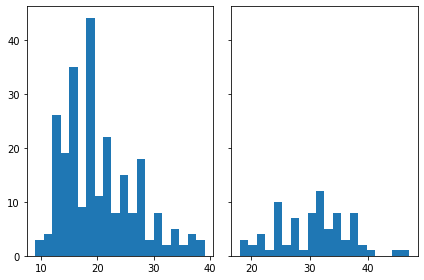

In [117]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(x, bins=20)
axs[1].hist(y, bins=20)

In [162]:
boot_current = boostrap_mean_ci(current_fleet, data.shape[0], i, 95)
boot_new = boostrap_mean_ci(current_fleet, data.shape[0], i, 95)

print('Current Fleet')
print('Mean -- Lower -- Higher')
print(boot_current)
print('New Fleet')
print('Mean -- Lower -- Higher')
print(boot_new)

dif = np.mean(new_fleet) - np.mean(current_fleet)

Current Fleet
Mean -- Lower -- Higher
(20.145981395455316, 19.3574297188755, 20.96385542168675)
New Fleet
Mean -- Lower -- Higher
(20.145429962261165, 19.365461847389557, 20.95200803212851)


In [165]:
concat = np.concatenate((current_fleet, new_fleet))
perm = np.random.permutation(concat)
counter = 0

for i in range(20000):
  pold = perm[:int(len(new_fleet))]
  pnew = perm[int(len(current_fleet)):]
  pdif =  np.mean(pnew) - np.mean(pold)
  if pdif > dif:
    counter+=1

print (counter)

0


As counter is smaller than 5% (is zero) we can reject the null hypothesis, concluding that the new fleet is better